In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>


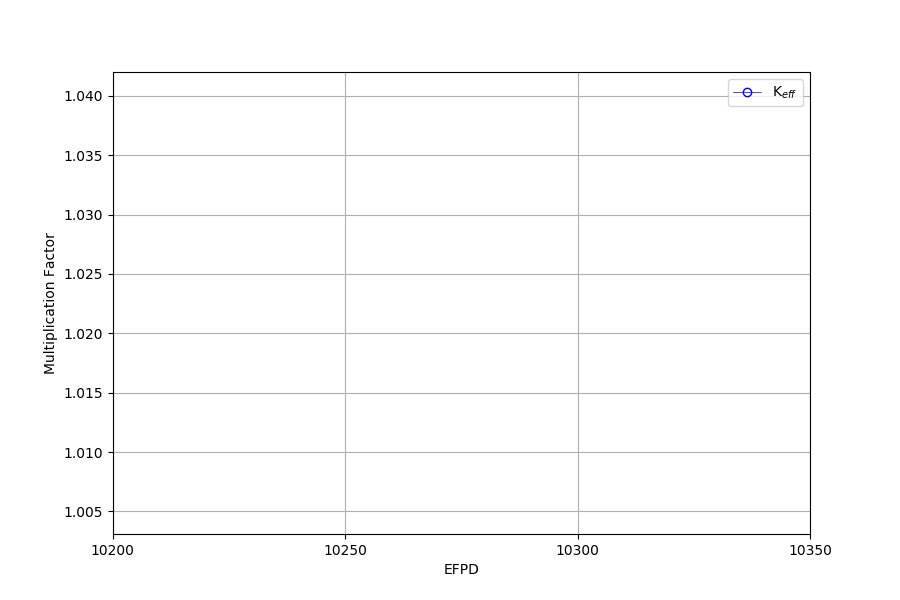

<IPython.core.display.Javascript object>


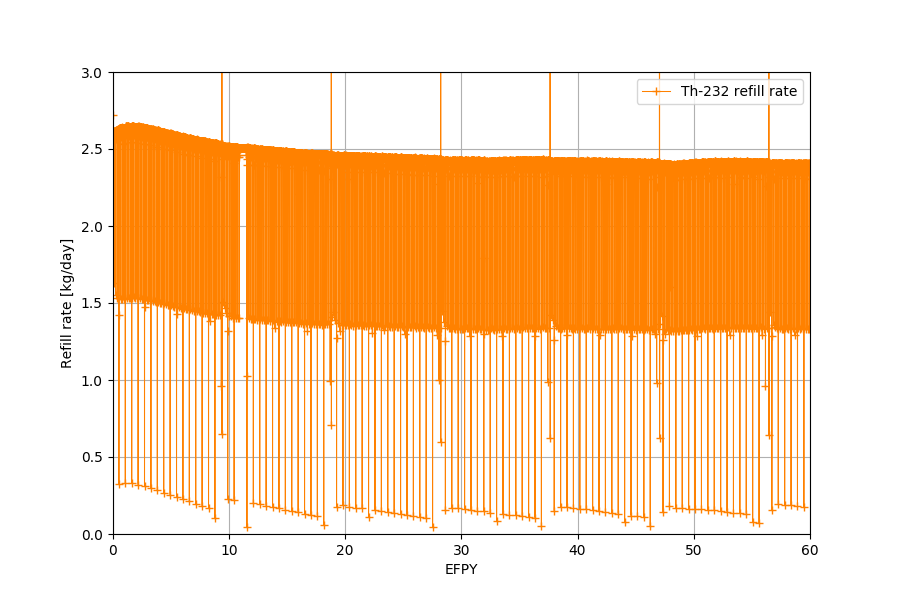

2.4036458333333335
Th-232 refill rate = 2.320233302899513 kg/day
22590
U-233 atomic density changing = 3.2356681221329247 %


In [11]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import data as d
from pyne import nucname
import h5py
import itertools
markers=itertools.cycle(('o','v','^','<','>','s','p','P','*','h','H','+','x','X','D','d','|','_'))
def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final
f = h5py.File('/home/andrei2/Desktop/git/MScThesis-MSBR/serpent/saltproc/bw_higher_tolerance/db_saltproc_7530_61year.hdf5', 'r')
#f = h5py.File('../../../MScThesis-MSBR/serpent/saltproc/bw_discard_03U_vol_48/db_saltproc_20y.hdf5', 'r')
#f = h5py.File('/home/andrei2/Desktop/git/MScThesis-MSBR/serpent/various_removal_cases/higher_tol_all_rems/db_saltproc.hdf5', 'r')
boc_keff_db  = f['keff_BOC']
eoc_keff_db  = f['keff_EOC']
core_boc = f['core adensity before reproc']
th_tank  = f['Th tank adensity']
iso_id   = f['iso_codes']

#print keff_db[0,:]
#print keff_db[1,:]
#print (dep['NAMES'])
#print refill_density[17,:]
#print Th232_rate*(1e+24)
# Volume of salt
V = 4.871e+7  # cm^3 volume of salt
boc_imp_keff = np.trim_zeros(boc_keff_db[0,:], 'b')           # K-eff parsing from dictionary (BOC)
boc_keff_error = np.trim_zeros(boc_keff_db[1,:], 'b')         # K-eff standart deviation (BOC)
eoc_imp_keff = np.trim_zeros(eoc_keff_db[0,:], 'b')           # K-eff parsing from dictionary (EOC)
eoc_keff_error = np.trim_zeros(eoc_keff_db[1,:], 'b')         # K-eff standart deviation (EOC)
#core_boc = np.trim_zeros(core_boc[1,:], 'b')         # K-eff standart deviation (EOC)
step = 3 # days
#EOC = # Manually specify time period
EOS = step*len(boc_imp_keff)
#days = np.arange(0,EOS,step)
days = np.arange(0,61.88907,0.008219)

# Th refill rate
th_mass_density = np.trim_zeros(th_tank[1:,1080]) * (232.0380553/0.6022140857)      # g/cm3
th_refill_rate = (th_mass_density * V * 0.001)        # kg/day

# Initialize figure
fig_keff_1 = matplotlib.pyplot.figure(1, figsize=[9,6])
ax = fig_keff_1.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax.plot(merge(days,days), merge(boc_imp_keff, eoc_imp_keff), '-', color='blue', label='K$_{eff}$', linewidth=0.1)
#ax.plot(days, (boc_imp_keff+eoc_imp_keff)/2, '-', color='blue', label='K$_{eff}$', linewidth=0.5)
#ax.plot(days, boc_imp_keff, '-', color='#ff8100', label='K-eff (BoC)', linewidth=0.5)
#ax.fill_between(days, boc_imp_keff-boc_keff_error, boc_imp_keff+boc_keff_error,alpha=1, 
#                edgecolor='#808080', facecolor='#BEBEBE', linewidth=0)
#ax.fill_between(days, eoc_imp_keff-eoc_keff_error, eoc_imp_keff+eoc_keff_error,alpha=1, 
#                edgecolor='#808080', facecolor='#BEBEBE', linewidth=0)
ax.set_xlim([0,60])
#ax.set_ylim([1.00, 1.075])
ax.set_xlabel('EFPY')
# Alternative 1 (average)
#ax.plot(days, (boc_imp_keff+eoc_imp_keff)/2, '-', color='blue', label='K$_{eff}$', linewidth=0.4)

# Alternative 2 (add zoomed)
ax.plot(merge(days,days), merge(boc_imp_keff, eoc_imp_keff), 'o-', markerfacecolor='none', color='blue', label='K$_{eff}$', linewidth=0.5)
ax.fill_between(days, boc_imp_keff-boc_keff_error, boc_imp_keff+boc_keff_error,alpha=1, 
                edgecolor='#808080', facecolor='#808080', linewidth=0.1)
ax.fill_between(days, eoc_imp_keff-eoc_keff_error, eoc_imp_keff+eoc_keff_error,alpha=1, 
                edgecolor='#808080', facecolor='#808080', linewidth=0.1)
#ax.errorbar(days, boc_imp_keff, yerr=boc_keff_error, label='at the beginning of step', )
ax.set_xlim([10200,10350])
ax.set_xticks([10200, 10250, 10300,10350])
#ax.set_xlim([3300,3550])
ax.set_xlabel('EFPD')
ax.set_ylim([1.0031, 1.042])
#ax.set_ylim([1.008, 1.05])
ax.axvspan(6000, 6810, alpha=0.5, color='blue')
ax.legend(loc=0)
ax.set_ylabel('Multiplication Factor')

#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')

fig_keff_1.show()
#fig_keff_1.savefig('../../../saltproc/examples/gallery/full_core/keff.png',bbox_inches='tight', dpi=700)
#fig_keff_1.savefig('/home/andrei2/Desktop/git/publications/msbr-reproc/figures/keff_zoomed.png',bbox_inches='tight', dpi=700)
'''
# Figure 2
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[9,6])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#for plot_nuclide in ['U233', 'U234', 'U235','Th232', 'Pa233','Pa232']:
#for plot_nuclide in ['U233']:
#for plot_nuclide in ['U233', 'Th232', 'Pa233','Pa232']:
#for plot_nuclide in ['U232', 'Pu238','Pu241','Am241', 'Cm244']: # fissile <900years
for plot_nuclide in ['U235', 'Pu239','Pu241','Am241', 'Np235', 'Am242']: # fissile in thermal spectrum
#for plot_nuclide in ['U235','Np237','Pu239','Pu240','Pu242','Am243']: # fissile >900years
    for i in range (len(iso_id)-1):
        # Resolving problem with wrong determining Th <==> F-22m
        isotope_id = iso_id[i].split(".")
        if len(isotope_id) == 2:
            final_id = ''.join((isotope_id[0],isotope_id[1][0]))
            if nucname.name(final_id) == plot_nuclide:
                print (str(nucname.name(final_id)) + ' = ' + str(core_boc[1:,i]))
                #ax.semilogy (days, core_boc[1:,i], '-', label=nucname.name(final_id)) #/ 8.0652e-2
                ax.semilogy (days, core_boc[1:,i], marker=markers.next(),markevery=609,
                             label=nucname.name(final_id), linewidth=1) #/ 8.0652e-2
        else:
            if nucname.name(iso_id[i]) == plot_nuclide:
                print (str(nucname.name(final_id)) + ' = ' + str(core_boc[1:,i]))
                #ax.semilogy (days, core_boc[1:,i], '-', label=nucname.name(nucname.name(iso_id[i])))
                ax.semilogy (days, core_boc[1:,i], marker=markers.next(),markevery=609,
                             label=nucname.name(final_id), linewidth=1)
#ax.plot(days, kinf, '-', label='K-inf')
ax.legend(loc=4)
ax.set_ylabel('Number density [atom/b-cm]')
#ax.set_ylabel('Mass density [g/cm$^3$]')
#ax.set_ylabel('Cumulative refill [kg]')
#ax.set_ylabel('Normalized number density')
#ax.set_ylabel('Number density [atom/b-cm]')
#ax.set_ylabel('Number density fraction')
ax.set_xlabel('EFPY')
#ax.set_title('\n\n$^{232}$Th consumption for full-core online reprocessing case ' + str(EOS) +' days')
#ax.set_title('\n\n$^{232}$Th refill rate for full-core online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim([0,EOS])
ax.set_xlim([0,60])
ax.set_ylim([1e-19, 2e-5])
#ax.set_ylim([0, 1.1])
fig_keff_2.show()
#fig_keff_2.savefig('/home/andrei2/Desktop/git/publications/msbr-reproc/figures/fissile_short.png',bbox_inches='tight', dpi=700)
'''
# Figure 3
fig_keff_3 = matplotlib.pyplot.figure(3, figsize=[9,6])
ax = fig_keff_3.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax.plot(days[1:], th_tank[1:-1,1080]-th_tank[:-2,1080], '-', color='#ff8100', label='Th-232')
#ax.plot(days, th_mass_density , '-', color='#ff8100', label='Th-232')
ax.plot(days[1:], abs (np.diff(th_refill_rate)) / step , '+-', markerfacecolor='none', color='#ff8100', 
                        label='Th-232 refill rate',linewidth=0.75)
ax.legend(loc=0)
#ax.set_ylabel('Cumulative refill [kg]')
ax.set_ylabel('Refill rate [kg/day]')
ax.set_xlabel('EFPY')
#ax.set_title('\n\n$^{232}$Th consumption for full-core online reprocessing case ' + str(EOS) +' days')
#ax.set_title('\n\n$^{232}$Th refill rate for full-core online reprocessing case ' + str(EOS) +' days')
ax.set_xlim([0,60])
ax.set_ylim([0,3])
#ax.set_ylim([0., 38])
#ax.set_xlim([10200,10350])
#ax.set_xticks([10200, 10250, 10300,10350])
fig_keff_3.show()
#fig_keff_3.savefig('../../../saltproc/examples/gallery/full_core/Th_refill_rate_kg_per_day(zoomed).png',bbox_inches='tight', dpi=500)
#fig_keff_3.savefig('/home/andrei2/Desktop/git/publications/msbr-reproc/figures/Th_refill_rate.png',bbox_inches='tight', dpi=700)

print (abs(th_refill_rate[-1] - th_refill_rate[-2]) / 3)
print ('Th-232 refill rate = ' + str(np.amax(abs(th_refill_rate)) / EOS) + ' kg/day')
print (EOS)
print ('U-233 atomic density changing = ' + str(100*abs(core_boc[1947,1095]-core_boc[-1,1095])/core_boc[833,1095]) + ' %')